# Evaluate Benchbase Result

About the benchmark:
> TPC-C involves a mix of five concurrent transactions of different types and complexity either executed on-line or queued for deferred execution. The database is comprised of nine types of tables with a wide range of record and population sizes. TPC-C is measured in transactions per minute (tpmC). While the benchmark portrays the activity of a wholesale supplier, TPC-C is not limited to the activity of any particular business segment, but, rather represents any industry that must manage, sell, or distribute a product or service.

<img src="https://raw.githubusercontent.com/wiki/cmu-db/benchbase/img/tpcc.png" alt="drawing" width="600"/>

References:
1. https://github.com/cmu-db/benchbase/wiki/TPC-C
1. http://www.vldb.org/pvldb/vol7/p277-difallah.pdf


## Import Packages

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import pickle
# Some nice output
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
from IPython.display import display, Markdown
%matplotlib inline

import evaluator

## Prepare Result

### Pick Result

In [2]:
code = "1674056386"
path = "./"

### Start Evaluation

In [3]:
evaluation = evaluator.benchbase(code=code, path=path)

### Transform all Benchmarking Log Files to DataFrames

We also pick the first log file to be an example for later

In [4]:
filename_example = ""

directory = os.fsencode(path+"/"+code)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.startswith("bexhoma-benchmarker") and filename.endswith(".log"):
        #print("filename:", filename)
        pod_name = filename[filename.rindex("-")+1:-len(".log")]
        #print("pod_name:", pod_name)
        jobname = filename[len("bexhoma-benchmarker-"):-len("-"+pod_name+".log")]
        #print("jobname:", jobname)
        evaluation.end_benchmarking(jobname)
        filename_example = filename

### Show a DataFrame for single Pod as Example

In [5]:
filename = path+"/"+code+"/"+filename_example+".df.pickle"
print(filename)
df = pd.read_pickle(filename)
df

.//1674056386/bexhoma-benchmarker-postgresql-24-1-8192-1674056386-1-2-knmk6.log.df.pickle


,connection,configuration,experiment_run,client,pod,pod_count,bench,profile,target,time,...,Throughput (requests/second),Latency Distribution.95th Percentile Latency (microseconds),Latency Distribution.Maximum Latency (microseconds),Latency Distribution.Median Latency (microseconds),Latency Distribution.Minimum Latency (microseconds),Latency Distribution.25th Percentile Latency (microseconds),Latency Distribution.90th Percentile Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),Latency Distribution.75th Percentile Latency (microseconds),Latency Distribution.Average Latency (microseconds)
PostgreSQL-24-1-8192-2,,,,,,,,,,,,,,,,,,,,,
0,PostgreSQL-24-1-8192-2,PostgreSQL-24-1-8192,1,2,knmk6,2,twitter,postgres,8192,60,...,8195.028745,488,1121505,305,157,274,422,816,351,377


### Transform all DataFrames into single Result DataFrame

In [6]:
evaluation.evaluate_results()

## Get Benchmarking Result

In [7]:
df = evaluation.get_df_benchmarking()
df

,connection,configuration,experiment_run,client,pod,pod_count,bench,profile,target,time,...,Throughput (requests/second),Latency Distribution.95th Percentile Latency (microseconds),Latency Distribution.Maximum Latency (microseconds),Latency Distribution.Median Latency (microseconds),Latency Distribution.Minimum Latency (microseconds),Latency Distribution.25th Percentile Latency (microseconds),Latency Distribution.90th Percentile Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),Latency Distribution.75th Percentile Latency (microseconds),Latency Distribution.Average Latency (microseconds)
connection_pod,,,,,,,,,,,,,,,,,,,,,
MySQL-24-1-8192-1-1,MySQL-24-1-8192-1,MySQL-24-1-8192,1,1,888k8,1,twitter,mysql,8192,60,...,8169.239439,582,1662909,407,198,381,502,1107,442,746
MySQL-24-1-8192-2-1,MySQL-24-1-8192-2,MySQL-24-1-8192,1,2,rq47v,2,twitter,mysql,8192,60,...,8192.148440,576,920932,347,166,320,460,2287,385,865
MySQL-24-1-8192-2-2,MySQL-24-1-8192-2,MySQL-24-1-8192,1,2,x6ccb,2,twitter,mysql,8192,60,...,8192.153750,455,922579,286,116,259,375,1358,320,752
PostgreSQL-24-1-8192-1-1,PostgreSQL-24-1-8192-1,PostgreSQL-24-1-8192,1,1,tcmm6,1,twitter,postgres,8192,60,...,8194.124865,239,732040,116,58,103,188,411,139,175
PostgreSQL-24-1-8192-2-1,PostgreSQL-24-1-8192-2,PostgreSQL-24-1-8192,1,2,c55nz,2,twitter,postgres,8192,60,...,8194.278354,276,1365207,120,57,107,215,570,149,185
PostgreSQL-24-1-8192-2-2,PostgreSQL-24-1-8192-2,PostgreSQL-24-1-8192,1,2,knmk6,2,twitter,postgres,8192,60,...,8195.028745,488,1121505,305,157,274,422,816,351,377


### Reconstruct workflow out of result

In [8]:
evaluation.reconstruct_workflow(df)

{'MySQL-24-1-8192': [[1, 2]], 'PostgreSQL-24-1-8192': [[1, 2]]}

### Plot Results

#### Set data types for plotting

In [9]:
df_plot = evaluation.benchmarking_set_datatypes(df)

df_plot

,connection,configuration,experiment_run,client,pod,pod_count,bench,profile,target,time,...,Throughput (requests/second),Latency Distribution.95th Percentile Latency (microseconds),Latency Distribution.Maximum Latency (microseconds),Latency Distribution.Median Latency (microseconds),Latency Distribution.Minimum Latency (microseconds),Latency Distribution.25th Percentile Latency (microseconds),Latency Distribution.90th Percentile Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),Latency Distribution.75th Percentile Latency (microseconds),Latency Distribution.Average Latency (microseconds)
connection_pod,,,,,,,,,,,,,,,,,,,,,
MySQL-24-1-8192-1-1,MySQL-24-1-8192-1,MySQL-24-1-8192,1,1,888k8,1,twitter,mysql,8192,60.0,...,8169.239439,582.0,1662909.0,407.0,198.0,381.0,502.0,1107.0,442.0,746.0
MySQL-24-1-8192-2-1,MySQL-24-1-8192-2,MySQL-24-1-8192,1,2,rq47v,2,twitter,mysql,8192,60.0,...,8192.148440,576.0,920932.0,347.0,166.0,320.0,460.0,2287.0,385.0,865.0
MySQL-24-1-8192-2-2,MySQL-24-1-8192-2,MySQL-24-1-8192,1,2,x6ccb,2,twitter,mysql,8192,60.0,...,8192.153750,455.0,922579.0,286.0,116.0,259.0,375.0,1358.0,320.0,752.0
PostgreSQL-24-1-8192-1-1,PostgreSQL-24-1-8192-1,PostgreSQL-24-1-8192,1,1,tcmm6,1,twitter,postgres,8192,60.0,...,8194.124865,239.0,732040.0,116.0,58.0,103.0,188.0,411.0,139.0,175.0
PostgreSQL-24-1-8192-2-1,PostgreSQL-24-1-8192-2,PostgreSQL-24-1-8192,1,2,c55nz,2,twitter,postgres,8192,60.0,...,8194.278354,276.0,1365207.0,120.0,57.0,107.0,215.0,570.0,149.0,185.0
PostgreSQL-24-1-8192-2-2,PostgreSQL-24-1-8192-2,PostgreSQL-24-1-8192,1,2,knmk6,2,twitter,postgres,8192,60.0,...,8195.028745,488.0,1121505.0,305.0,157.0,274.0,422.0,816.0,351.0,377.0


#### Restrict result to specific part

In [10]:
#df_plot = df_plot[df_plot["experiment_run"]=="1"]
#df_plot = df_plot[df_plot["client"] == 1]
df_plot

,connection,configuration,experiment_run,client,pod,pod_count,bench,profile,target,time,...,Throughput (requests/second),Latency Distribution.95th Percentile Latency (microseconds),Latency Distribution.Maximum Latency (microseconds),Latency Distribution.Median Latency (microseconds),Latency Distribution.Minimum Latency (microseconds),Latency Distribution.25th Percentile Latency (microseconds),Latency Distribution.90th Percentile Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),Latency Distribution.75th Percentile Latency (microseconds),Latency Distribution.Average Latency (microseconds)
connection_pod,,,,,,,,,,,,,,,,,,,,,
MySQL-24-1-8192-1-1,MySQL-24-1-8192-1,MySQL-24-1-8192,1,1,888k8,1,twitter,mysql,8192,60.0,...,8169.239439,582.0,1662909.0,407.0,198.0,381.0,502.0,1107.0,442.0,746.0
MySQL-24-1-8192-2-1,MySQL-24-1-8192-2,MySQL-24-1-8192,1,2,rq47v,2,twitter,mysql,8192,60.0,...,8192.148440,576.0,920932.0,347.0,166.0,320.0,460.0,2287.0,385.0,865.0
MySQL-24-1-8192-2-2,MySQL-24-1-8192-2,MySQL-24-1-8192,1,2,x6ccb,2,twitter,mysql,8192,60.0,...,8192.153750,455.0,922579.0,286.0,116.0,259.0,375.0,1358.0,320.0,752.0
PostgreSQL-24-1-8192-1-1,PostgreSQL-24-1-8192-1,PostgreSQL-24-1-8192,1,1,tcmm6,1,twitter,postgres,8192,60.0,...,8194.124865,239.0,732040.0,116.0,58.0,103.0,188.0,411.0,139.0,175.0
PostgreSQL-24-1-8192-2-1,PostgreSQL-24-1-8192-2,PostgreSQL-24-1-8192,1,2,c55nz,2,twitter,postgres,8192,60.0,...,8194.278354,276.0,1365207.0,120.0,57.0,107.0,215.0,570.0,149.0,185.0
PostgreSQL-24-1-8192-2-2,PostgreSQL-24-1-8192-2,PostgreSQL-24-1-8192,1,2,knmk6,2,twitter,postgres,8192,60.0,...,8195.028745,488.0,1121505.0,305.0,157.0,274.0,422.0,816.0,351.0,377.0


#### Plot metrics

No handles with labels found to put in legend.


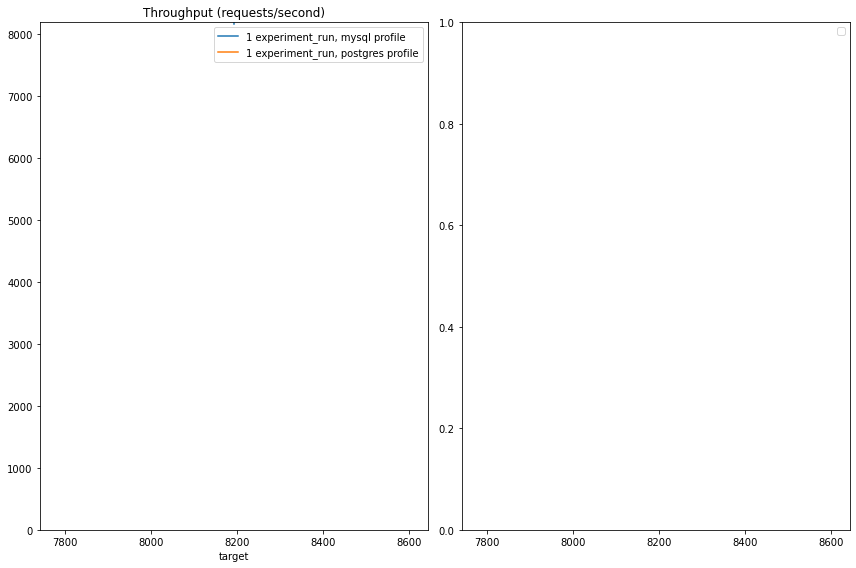

In [11]:
%matplotlib inline

column = "profile"
x = "target"
y = "Throughput (requests/second)"
plot_by = "experiment_run"

evaluation.plot(df_plot, column=column, x=x, y=y, plot_by=plot_by)

No handles with labels found to put in legend.


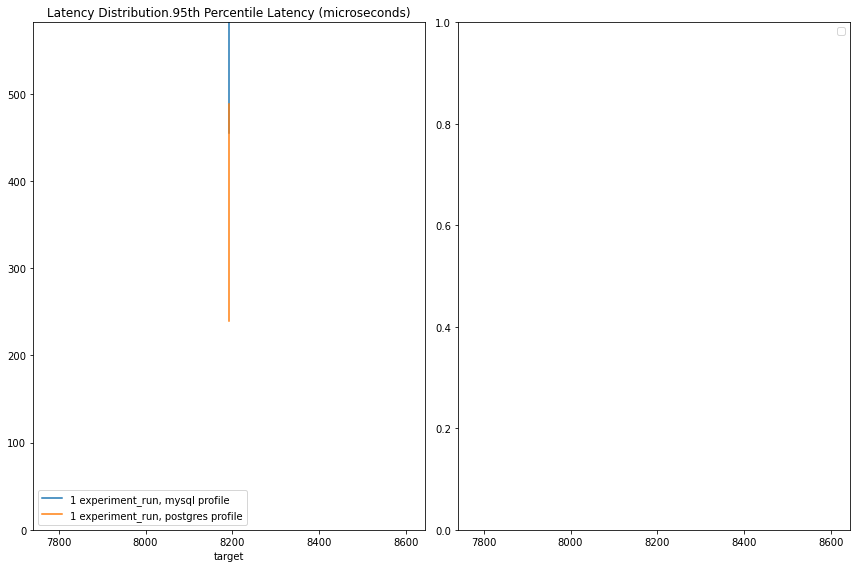

In [12]:
column = "profile"
x = "target"
y = "Latency Distribution.95th Percentile Latency (microseconds)"
evaluation.plot(df_plot, column=column, x=x, y=y, plot_by="experiment_run")

### Aggregate by parallel pods

In [13]:
df = evaluation.get_df_benchmarking()
df_plot = evaluation.benchmarking_set_datatypes(df)
df_aggregated = evaluation.benchmarking_aggregate_by_parallel_pods(df_plot)
df_aggregated

,connection,configuration,experiment_run,client,pod,pod_count,bench,profile,target,time,...,Throughput (requests/second),Latency Distribution.95th Percentile Latency (microseconds),Latency Distribution.Maximum Latency (microseconds),Latency Distribution.Median Latency (microseconds),Latency Distribution.Minimum Latency (microseconds),Latency Distribution.25th Percentile Latency (microseconds),Latency Distribution.90th Percentile Latency (microseconds),Latency Distribution.99th Percentile Latency (microseconds),Latency Distribution.75th Percentile Latency (microseconds),Latency Distribution.Average Latency (microseconds)
MySQL-24-1-8192-1,MySQL-24-1-8192-1,MySQL-24-1-8192,1,1,888k8,1,twitter,mysql,8192,60.0,...,8169.239439,582.0,1662909.0,407.0,198.0,381.0,502.0,1107.0,442.0,746.0
MySQL-24-1-8192-2,MySQL-24-1-8192-2,MySQL-24-1-8192,1,2,rq47vx6ccb,2,twitter,mysql,16384,60.0,...,16384.302191,576.0,922579.0,347.0,116.0,320.0,460.0,2287.0,385.0,808.5
PostgreSQL-24-1-8192-1,PostgreSQL-24-1-8192-1,PostgreSQL-24-1-8192,1,1,tcmm6,1,twitter,postgres,8192,60.0,...,8194.124865,239.0,732040.0,116.0,58.0,103.0,188.0,411.0,139.0,175.0
PostgreSQL-24-1-8192-2,PostgreSQL-24-1-8192-2,PostgreSQL-24-1-8192,1,2,c55nzknmk6,2,twitter,postgres,16384,60.0,...,16389.307099,488.0,1365207.0,305.0,57.0,274.0,422.0,816.0,351.0,281.0


#### Plot

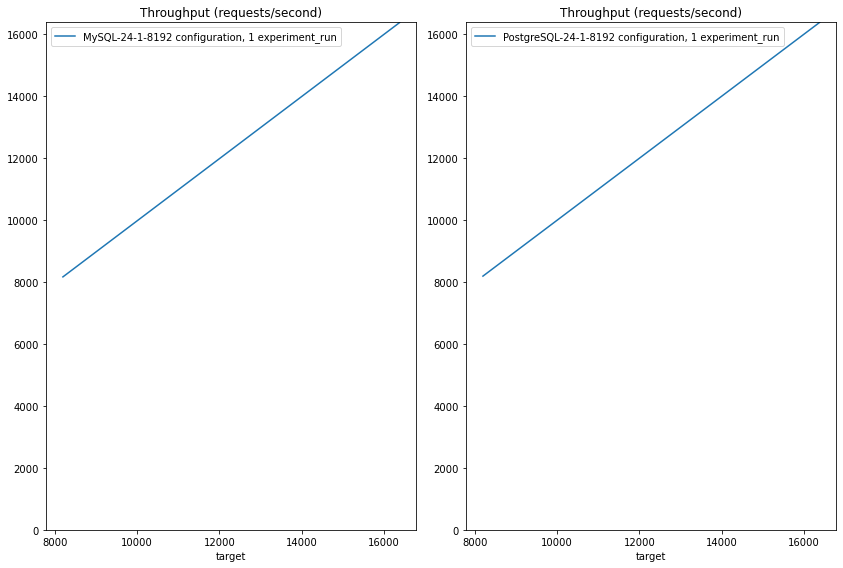

In [14]:
column = "experiment_run"
x = "target"
y = "Throughput (requests/second)"
evaluation.plot(df_aggregated, column=column, x=x, y=y, plot_by="configuration")

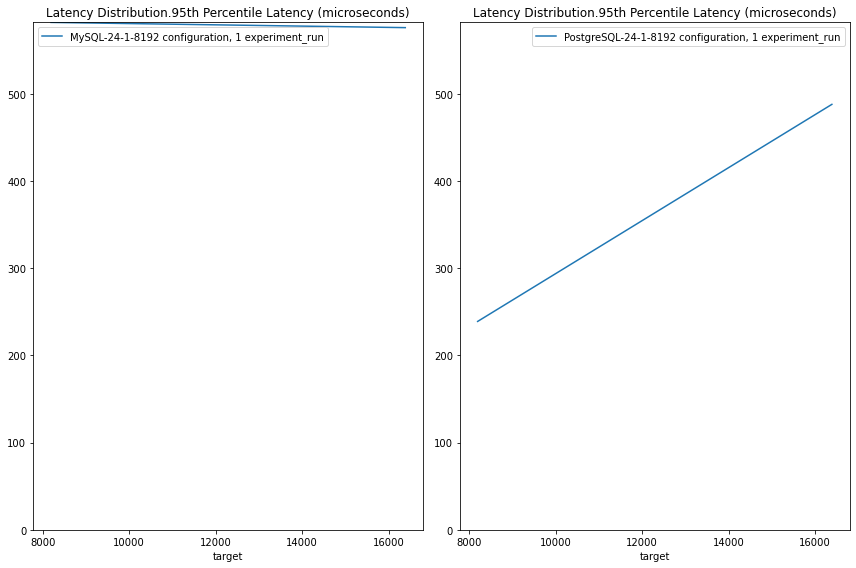

In [15]:
column = "experiment_run"
x = "target"
y = "Latency Distribution.95th Percentile Latency (microseconds)"
evaluation.plot(df_aggregated, column=column, x=x, y=y, plot_by="configuration")

## Show Infos about Connections

In [16]:
connections = evaluation.get_connection_config()

print("found", len(connections), "connections")

found 4 connections


In [17]:
import json
pretty_connections = json.dumps(connections, indent=2)

print(pretty_connections)

[
  {
    "version": "CE 8.0.22",
    "alias": "DBMS D",
    "docker_alias": "GP-C",
    "dialect": "MySQL",
    "JDBC": {
      "driver": "com.mysql.cj.jdbc.Driver",
      "auth": [
        "root",
        ""
      ],
      "url": "jdbc:mysql://bexhoma-sut-mysql-24-1-8192-1674056386.perdelt.svc.cluster.local:9091/benchbase",
      "jar": [
        "./jars/mysql-connector-j-8.0.31.jar",
        "./jars/slf4j-simple-1.7.21.jar"
      ]
    },
    "active": true,
    "name": "MySQL-24-1-8192-1",
    "docker": "MySQL",
    "script": "Schema",
    "info": [],
    "timeLoad": 86.10324888676405,
    "priceperhourdollar": 0.0,
    "hostsystem": {
      "RAM": 1081999486976,
      "CPU": "",
      "GPU": "",
      "GPUIDs": [],
      "Cores": 256,
      "host": "5.4.0-126-generic",
      "node": "cl-worker28",
      "disk": 508938276,
      "datadisk": 8507004,
      "cuda": "",
      "requests_cpu": "4",
      "requests_memory": "16Gi",
      "limits_cpu": 0,
      "limits_memory": 0
    },
 

### Loading time per number of loading threads

In [18]:
for c in connections:
    print(c['name'], 
          c['timeLoad'], 
          '[s] for', 
          c['parameter']['connection_parameter']['loading_parameters']['PARALLEL'], 
          'threads on',
          c['hostsystem']['node'])

MySQL-24-1-8192-1 86.10324888676405 [s] for 1 threads on cl-worker28
MySQL-24-1-8192-2 86.10324888676405 [s] for 1 threads on cl-worker28
PostgreSQL-24-1-8192-1 65.46283559501171 [s] for 1 threads on cl-worker28
PostgreSQL-24-1-8192-2 65.46283559501171 [s] for 1 threads on cl-worker28


## Get monitoring metrics

### Loading

In [19]:
evaluation.transform_monitoring_results()

In [20]:
evaluation.get_monitoring_metrics()

['total_cpu_memory',
 'total_cpu_memory_cached',
 'total_cpu_util',
 'total_cpu_throttled',
 'total_cpu_util_others',
 'total_cpu_util_s',
 'total_cpu_util_user_s',
 'total_cpu_util_sys_s',
 'total_cpu_throttled_s',
 'total_cpu_util_others_s',
 'total_network_rx',
 'total_network_tx',
 'total_fs_read',
 'total_fs_write',
 'total_gpu_util',
 'total_gpu_power',
 'total_gpu_memory']

In [21]:
df = evaluation.get_monitoring_metric('total_cpu_memory')

df.T

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
MySQL-24-1-8192-1,398.523438,398.523438,398.523438,4666.882812,4666.882812,4666.882812,4666.882812,4666.882812,4666.882812,4666.882812,...,19487.855469,19487.855469,19487.855469,19487.855469,19487.855469,19487.855469,19522.527344,19522.527344,19522.527344,19522.527344
MySQL-24-1-8192-2,398.523438,398.523438,398.523438,4666.882812,4666.882812,4666.882812,4666.882812,4666.882812,4666.882812,4666.882812,...,19487.855469,19487.855469,19487.855469,19487.855469,19487.855469,19487.855469,19522.527344,19522.527344,19522.527344,19522.527344
PostgreSQL-24-1-8192-1,1119.636719,1119.636719,1119.636719,1120.699219,1120.699219,1120.699219,1120.699219,1120.699219,1120.699219,1120.699219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostgreSQL-24-1-8192-2,1119.636719,1119.636719,1119.636719,1120.699219,1120.699219,1120.699219,1120.699219,1120.699219,1120.699219,1120.699219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


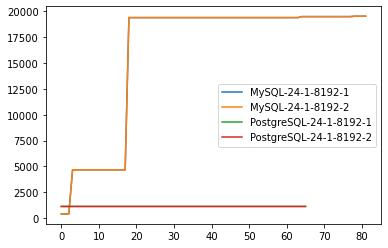

In [22]:
%matplotlib inline
#fig, ax = plt.subplots()
ax = df.plot(kind='line')
#ax.set_ylim(0,df[y].max())
plt.legend(loc='best')
plt.show()


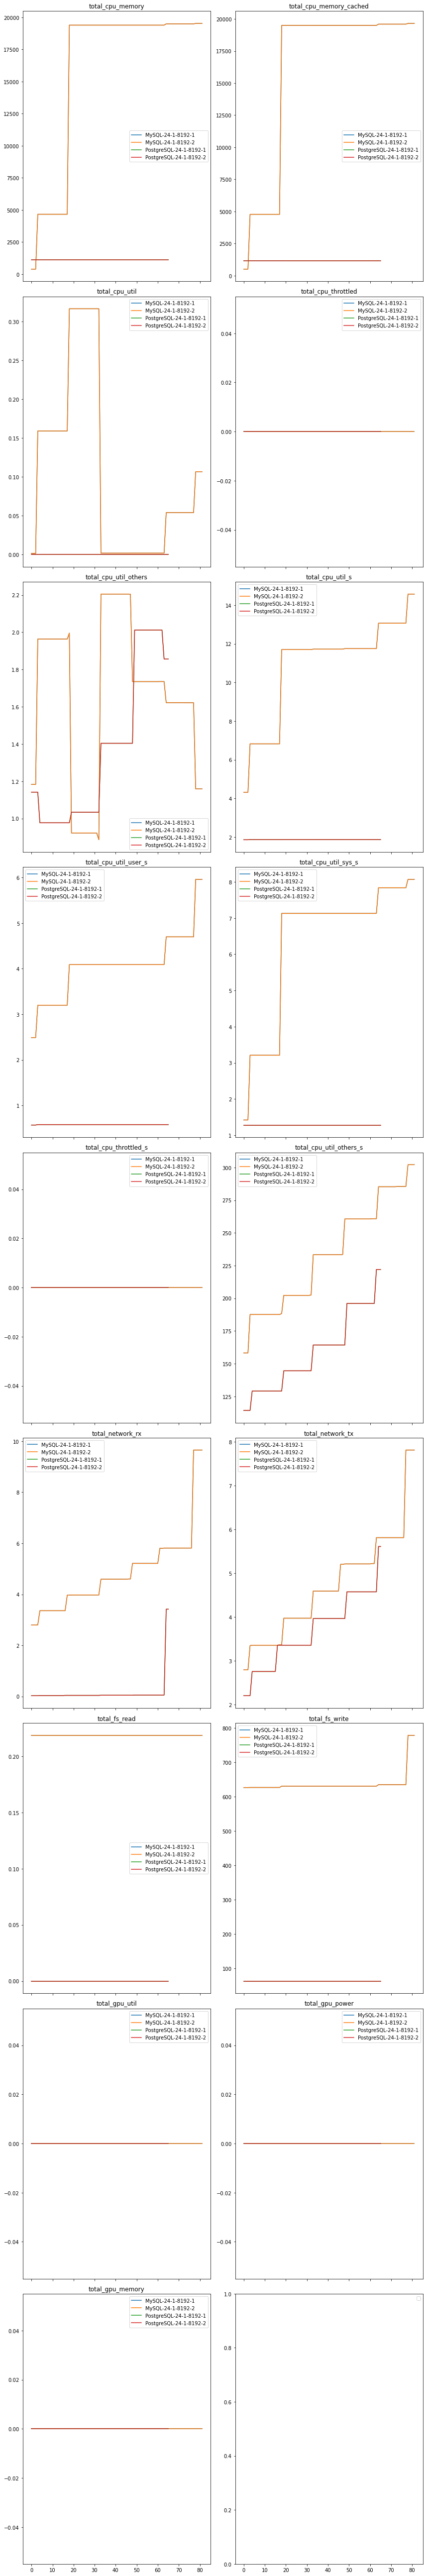

In [23]:
list_metrics = evaluation.get_monitoring_metrics()
row=0
col=0
rows = (len(list_metrics)+1)//2

fig, axes = plt.subplots(nrows=rows, ncols=2, sharex=True, squeeze=False, figsize=(12,8*rows))
for metric in list_metrics:
    df = evaluation.get_monitoring_metric(metric)
    ax = df.plot(ax=axes[row,col], kind='line', title=metric, layout=(rows,2))
    col = col + 1
    if col > 1:
        row = row + 1
        col = 0
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Benchmarking

In [24]:
evaluation.transform_monitoring_results(component='stream')

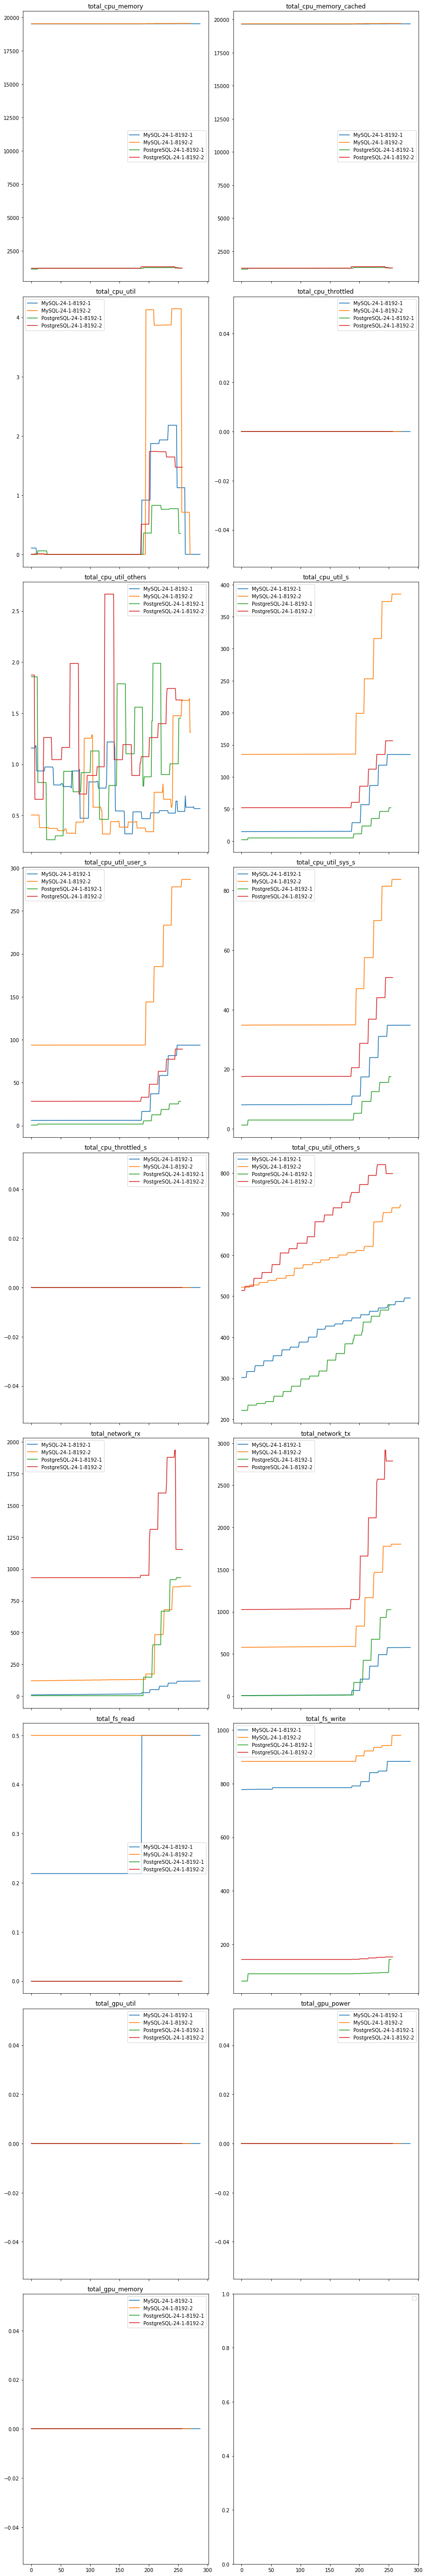

In [25]:
list_metrics = evaluation.get_monitoring_metrics()
row=0
col=0
rows = (len(list_metrics)+1)//2

fig, axes = plt.subplots(nrows=rows, ncols=2, sharex=True, squeeze=False, figsize=(12,8*rows))
for metric in list_metrics:
    df = evaluation.get_monitoring_metric(metric, component='stream')
    #if df.sum().sum() > 0:
    ax = df.plot(ax=axes[row,col], kind='line', title=metric, layout=(rows,2))
    col = col + 1
    if col > 1:
        row = row + 1
        col = 0
plt.legend(loc='best')
plt.tight_layout()
plt.show()